To analyze stationarity of a process (for mathematical
expectation and variance)


To analyze covariance function. To define covariance
(or correlation window)


To estimate spectral density function with using
different functions for spectral window


To filter high frequencies (noise) with using various
filters (e.g. moving average, Gaussian filter)

To repeat estimation of spectral density and compare
with result for non-filtered data

To built Rice model for process (using filtered and non-
filtered data)


To built auto-regression model filtered and non-filtered
data. To analyze residual error and to define
appropriate order of model

To find additional factors that influence on chosen
index (e.g. oil prices, gold prices, number of deaths,
other indexes etc.)


To analyze mutual correlation functions among factors

To build model in a form of linear dynamical system,
using additional factors. To analyze residual error and
to define appropriate order of model


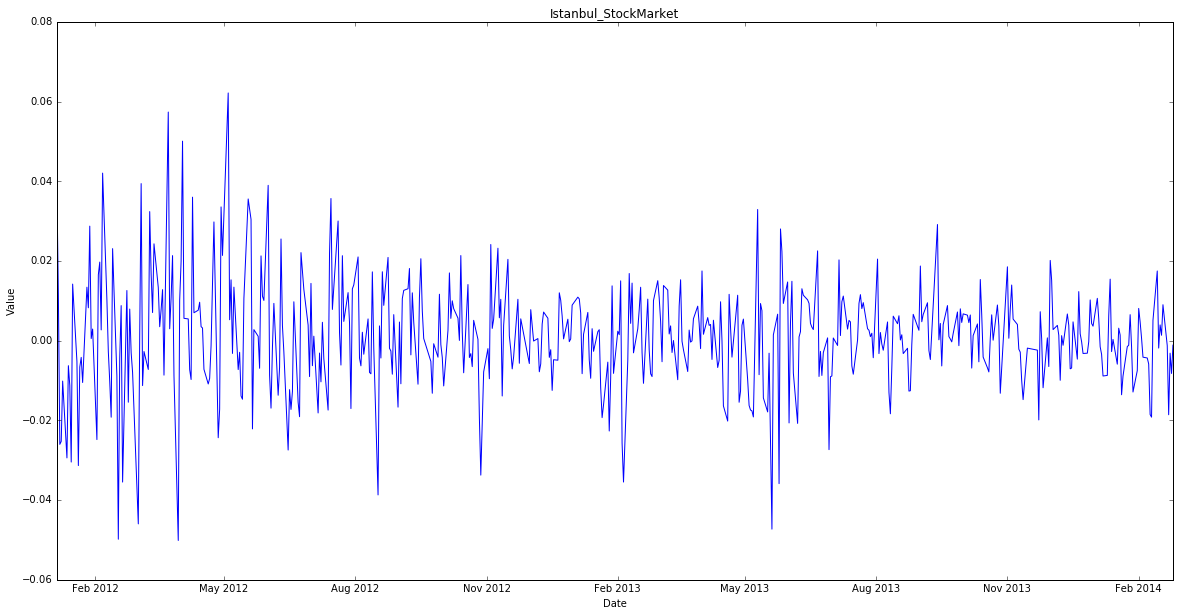

In [1]:
%matplotlib inline
import locale

import datetime
import pandas as pd
import matplotlib.pyplot as plt

def month_converter(month):
    split = str(month).split("-")
    month = split[1]
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return datetime.datetime(day=int(split[0]), month=months.index(month) + 1, year=int("20"+split[2]))

locale.setlocale(locale.LC_NUMERIC, '')
raw_data = pd.read_csv('Istanbul_StockMarket_12-14.csv', delimiter=';', names=["date", "value"])
raw_data['value'] = raw_data['value'].str.replace(',', '.').astype('float')
raw_data['date'] = raw_data['date'].apply(month_converter)

plt.figure(figsize=(20, 10))
plt.title('Istanbul_StockMarket')
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(raw_data['date'].values, raw_data['value'].values, label="")
plt.show()



Adding -10 for days of

In [2]:
start_date = raw_data.values[0, 0]
end_date = raw_data.values[-1, 0]
date_list = [(start_date + datetime.timedelta(days=x)) for x in range(0, (end_date - start_date).days + 1)]

data = pd.DataFrame(float(0), index=date_list, columns=["value"])

for raw_value in raw_data.values:
    data.ix[raw_value[0]] =  raw_value[1]
    
print(data)  


               value
2012-01-05  0.037082
2012-01-06  0.011404
2012-01-07 -0.026020
2012-01-08 -0.025251
2012-01-09 -0.010143
2012-01-10  0.000000
2012-01-11  0.000000
2012-01-12 -0.029419
2012-01-13 -0.006275
2012-01-14 -0.011280
2012-01-15 -0.030457
2012-01-16  0.014192
2012-01-17  0.000000
2012-01-18  0.000000
2012-01-19 -0.005238
2012-01-20 -0.031339
2012-01-21 -0.006620
2012-01-22 -0.004195
2012-01-23 -0.010501
2012-01-24  0.000000
2012-01-25  0.000000
2012-01-26  0.013416
2012-01-27  0.008248
2012-01-28  0.028735
2012-01-29  0.000531
2012-01-30  0.002915
2012-01-31  0.000000
2012-02-01  0.000000
2012-02-02 -0.024819
2012-02-03  0.016534
...              ...
2014-01-27 -0.001494
2014-01-28 -0.012885
2014-01-29  0.000000
2014-01-30  0.000000
2014-01-31 -0.007525
2014-02-01  0.008091
2014-02-02  0.004721
2014-02-03  0.000619
2014-02-04 -0.004140
2014-02-05  0.000000
2014-02-06  0.000000
2014-02-07 -0.004349
2014-02-08 -0.005849
2014-02-09 -0.018523
2014-02-10 -0.019188
2014-02-11  0

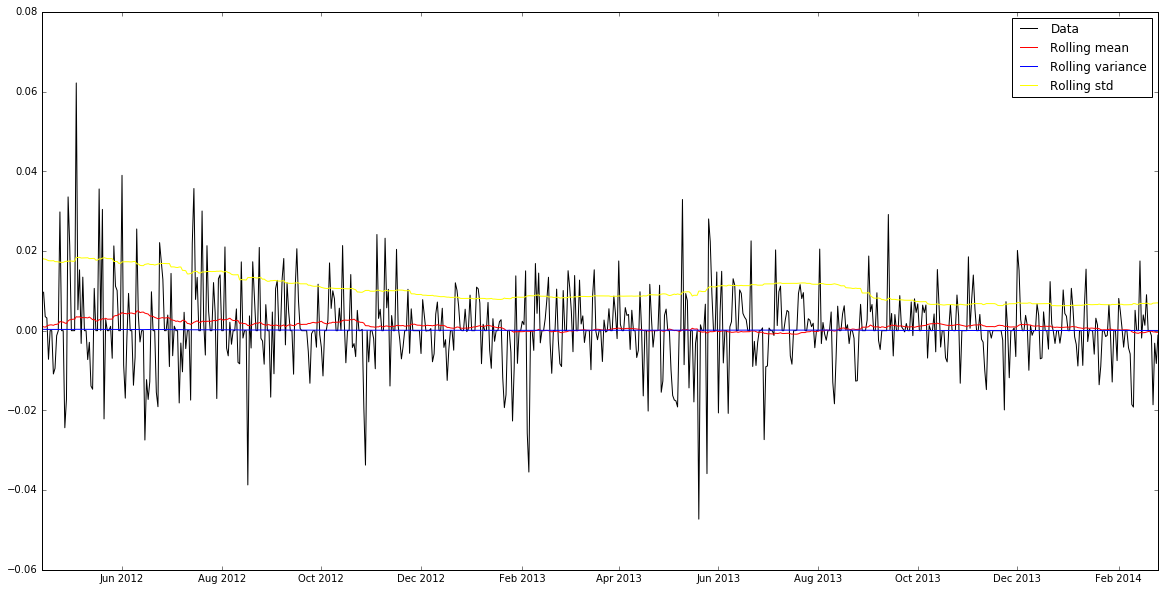

In [3]:
window = 100

rolling = data.rolling(window=window)
rolmean = rolling.mean()
rolvar =  rolling.var()   
rolstd =  rolling.std()   


plt.figure(2, figsize=(20,10))
plt.plot(data[window:], color='black', label='Data')
plt.plot(rolmean, color='red', label='Rolling mean')
plt.plot(rolvar, color='blue', label = 'Rolling variance')
plt.plot(rolstd, color='yellow', label = 'Rolling std')
plt.legend(loc='best')
plt.show()



[  8.71095494e-06]


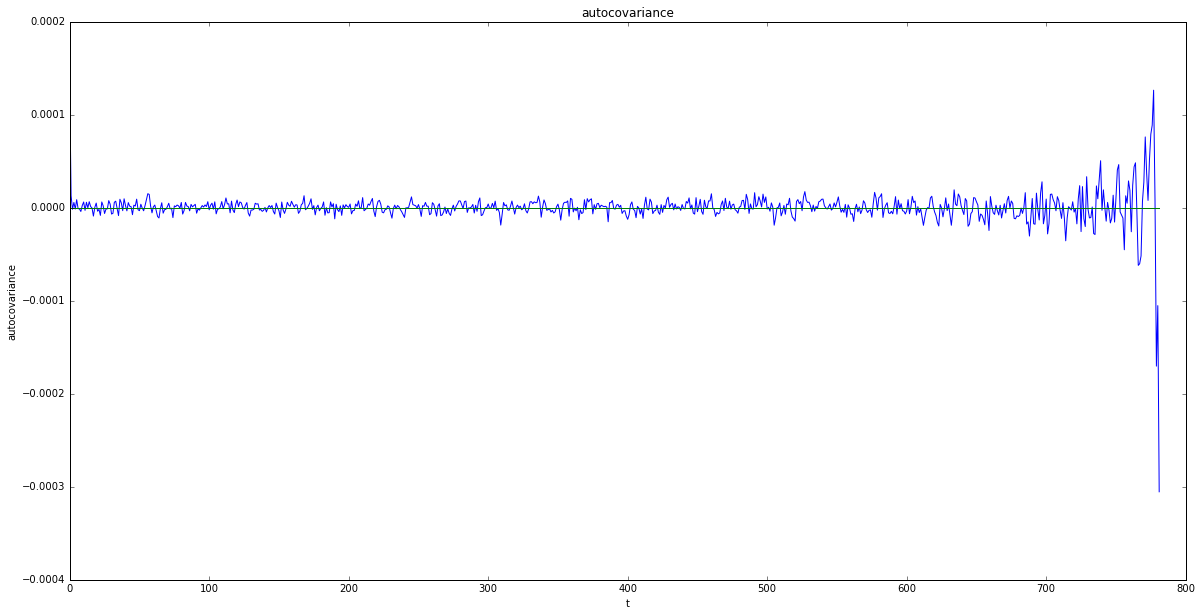

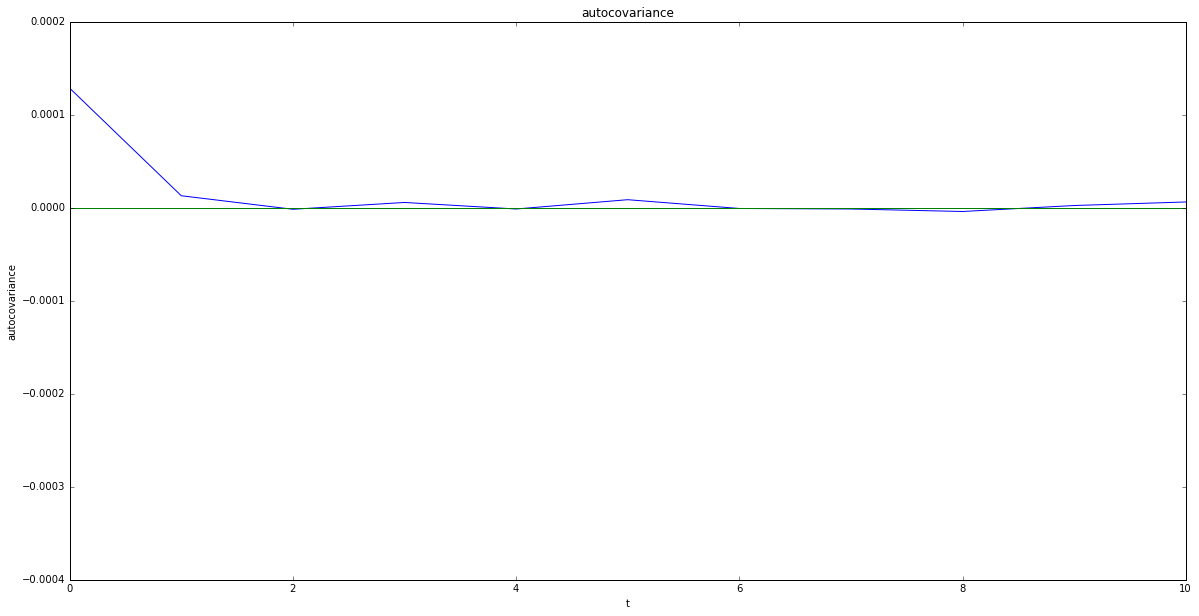

In [4]:
import numpy

values = data.values
mean = 0

def cov(t):
    summ = 0
    for i in range(0, len(values) - t - 1):
        summ += (values[i] - mean)*(values[i+t] - mean)
    return summ   

def cov(t):
    summ = 0
    return (1/(len(values) - t - 1)) * sum([(values[i] - mean)*(values[i+t] - mean) for i in range(0, len(values) - t - 1)])

print(cov(5))

x = [i for i in range(0, len(values) - 1)]
y = [cov(i) for i in range(0, len(values) - 1)]



plt.figure(figsize=(20, 10))
plt.title('autocovariance')
plt.xlabel('t')
plt.ylabel('autocovariance')
plt.plot(x, y, label="")
plt.plot(x, [0 for i in range(0, len(values) - 1)], label="")

plt.show()
    
    

plt.figure(figsize=(20, 10))
plt.title('autocovariance')
plt.xlabel('t')
plt.ylabel('autocovariance')
plt.plot(x, y, label="")
plt.plot(x, [0 for i in range(0, len(values) - 1)], label="")
plt.xlim(0,10)

plt.show()
        

Spectrum density estimation

In [143]:
# from __future__ import division
# import numpy as np
# import matplotlib.pyplot as plt

# ps = np.abs(np.fft.fft(data.values[:,0]))**2

# time_step = 1 / 30
# freqs = np.fft.fftfreq(data.size, time_step)
# idx = np.argsort(freqs)

# plt.plot(freqs[idx], ps[idx])
# plt.xlim(0,3.14)
# plt.show()

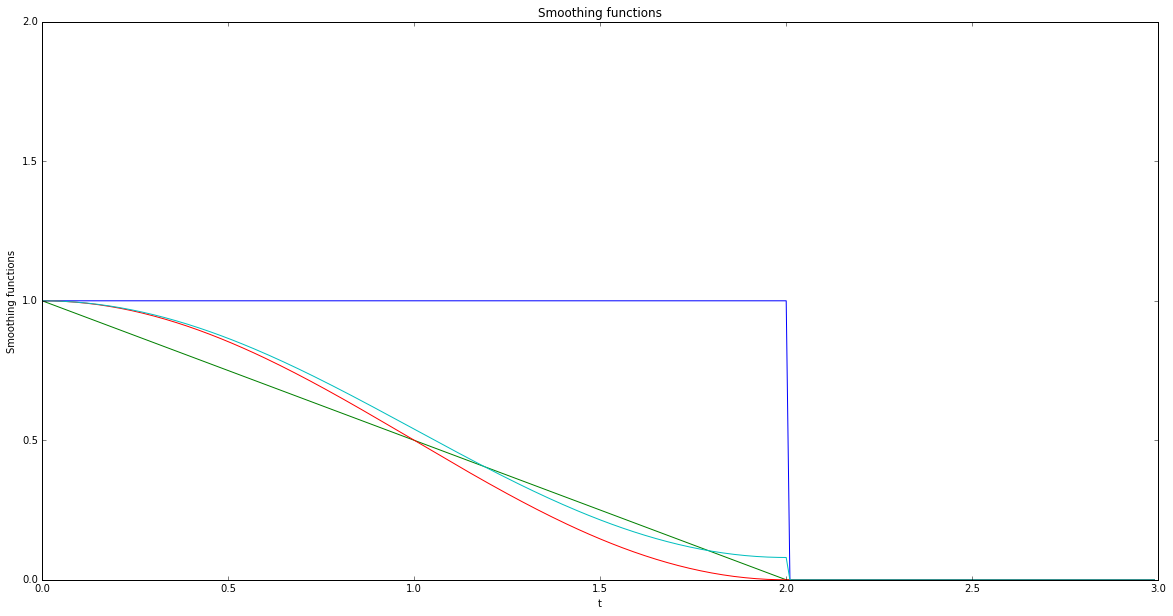

In [6]:
import math
import numpy as np

taumax = 2  

def lamBarret(t):
    if t > taumax: return 0 
    else: return 1
    
def lamBarretMod(t):
    if t > taumax:  return 0 
    else: return 1 - math.fabs(t)/taumax
    
def lamHann(t):
    if t > taumax:  return 0 
    else: return 0.5*(1 + math.cos((math.pi * t)/taumax))
    
def lamHemming(t):
    if t > taumax:  return 0 
    else: return 0.54 + 0.46 * math.cos((math.pi * t)/taumax)
    
x = [i for i in np.arange(0, taumax+1, 0.01)]    

plt.figure(figsize=(20, 10))
plt.title('Smoothing functions')
plt.xlabel('t')
plt.ylabel('Smoothing functions')    
plt.plot(x, [lamBarret(t) for t in x], label='lamBarret')
plt.plot(x, [lamBarretMod(t) for t in x], label='lamBarretMod')
plt.plot(x, [lamHann(t) for t in x], label='lamBarretMod')
plt.plot(x, [lamHemming(t) for t in x], label='lamBarretMod')
plt.xlim(0,taumax+1)
plt.ylim(0,taumax)
plt.show()    

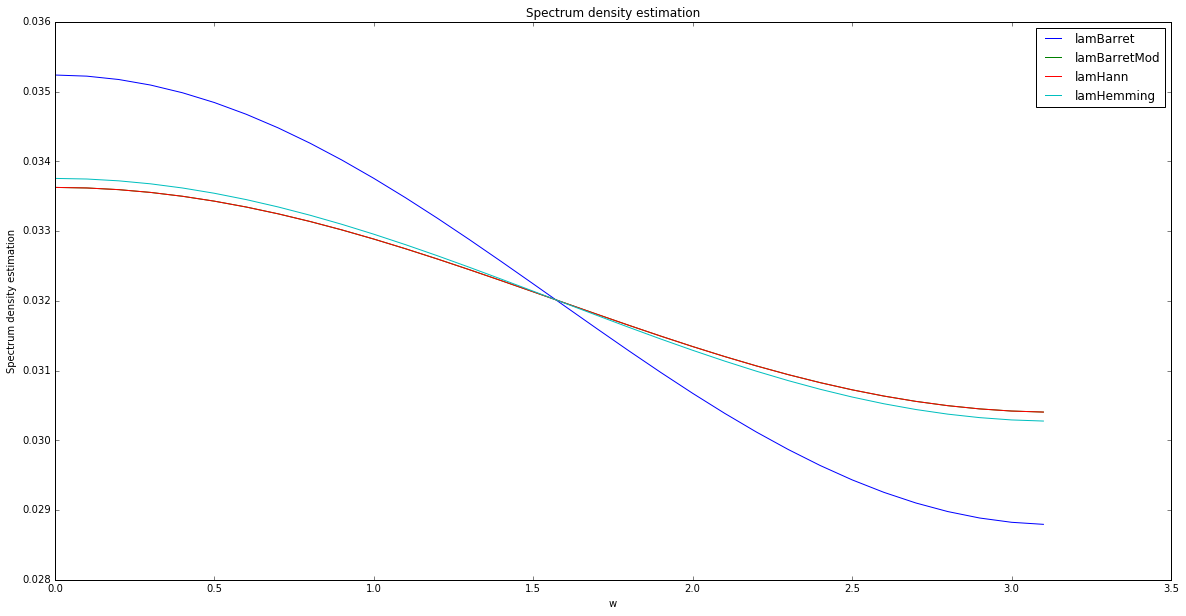

In [7]:
values = data.values
mean = 0

def cov(t):
    summ = 0
    for i in range(0, len(values) - t - 1):
        summ += (values[i] - mean)*(values[i+t] - mean)
    return summ  


def SBarret(w, smoothFunction):    
    return (1/math.pi) * sum([smoothFunction(t)*cov(t)*math.cos(w*t) for t in np.arange(0, taumax)] )


    
ws = [i for i in np.arange(0, math.pi, 0.1)]    

plt.figure(figsize=(20, 10))
plt.title('Spectrum density estimation')
plt.xlabel('w')
plt.ylabel('Spectrum density estimation')    
plt.plot(ws, [SBarret(w,lamBarret) for w in ws], label='lamBarret')
plt.plot(ws, [SBarret(w,lamBarretMod) for w in ws], label='lamBarretMod')
plt.plot(ws, [SBarret(w,lamHann) for w in ws], label='lamHann')
plt.plot(ws, [SBarret(w,lamHemming) for w in ws], label='lamHemming')


# plt.plot(x, [lamBarretMod(t) for t in x], label='lamBarretMod')
# plt.plot(x, [lamHann(t) for t in x], label='lamBarretMod')
# plt.plot(x, [lamHemming(t) for t in x], label='lamBarretMod')
# plt.xlim(0,taumax+1)
# plt.ylim(0,taumax+1)
plt.legend()
plt.show()    

Simple Moving Average Filtering

9.07445886228e-06


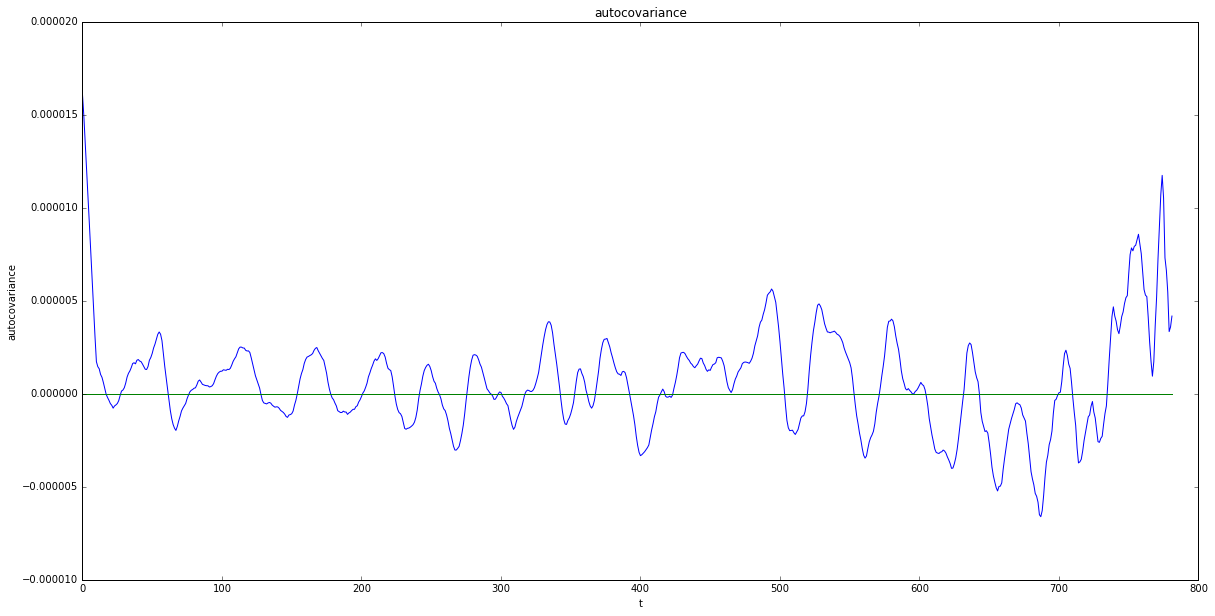

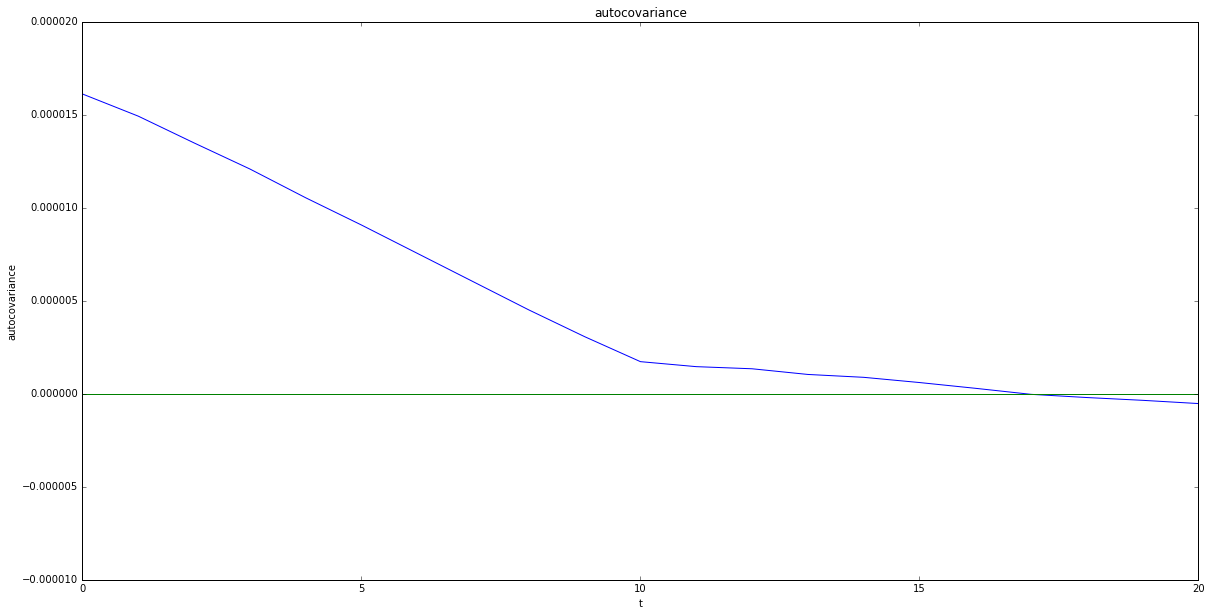

In [8]:
from __future__ import division
from numpy import linspace, loadtxt, ones, convolve
import numpy as numpy


def movingaverage(interval, window_size):
    window = numpy.ones(int(window_size))/float(window_size)
    return numpy.convolve(interval, window, 'same')

x = data.index.values
y = data.values[:,0]

# print(x)
# print(y)


y_av = movingaverage(y, 10)
# print(y_av)
# for i in range(0, len(y) - 1):
#     print(y[i], y_av[i])
    
plt.figure(figsize=(20, 10))
import numpy

values = y_av
mean = 0

def cov(t):
    summ = 0
    for i in range(0, len(values) - t - 1):
        summ += (values[i] - mean)*(values[i+t] - mean)
    return summ   

def cov(t):
    summ = 0
    return (1/(len(values) - t - 1)) * sum([(values[i] - mean)*(values[i+t] - mean) for i in range(0, len(values) - t - 1)])

print(cov(5))

x = [i for i in range(0, len(values) - 1)]
y = [cov(i) for i in range(0, len(values) - 1)]



plt.figure(figsize=(20, 10))
plt.title('autocovariance')
plt.xlabel('t')
plt.ylabel('autocovariance')
plt.plot(x, y, label="")
plt.plot(x, [0 for i in range(0, len(values) - 1)], label="")

plt.show()
    
    

plt.figure(figsize=(20, 10))
plt.title('autocovariance')
plt.xlabel('t')
plt.ylabel('autocovariance')
plt.plot(x, y, label="")
plt.plot(x, [0 for i in range(0, len(values) - 1)], label="")
plt.xlim(0,20)

plt.show()

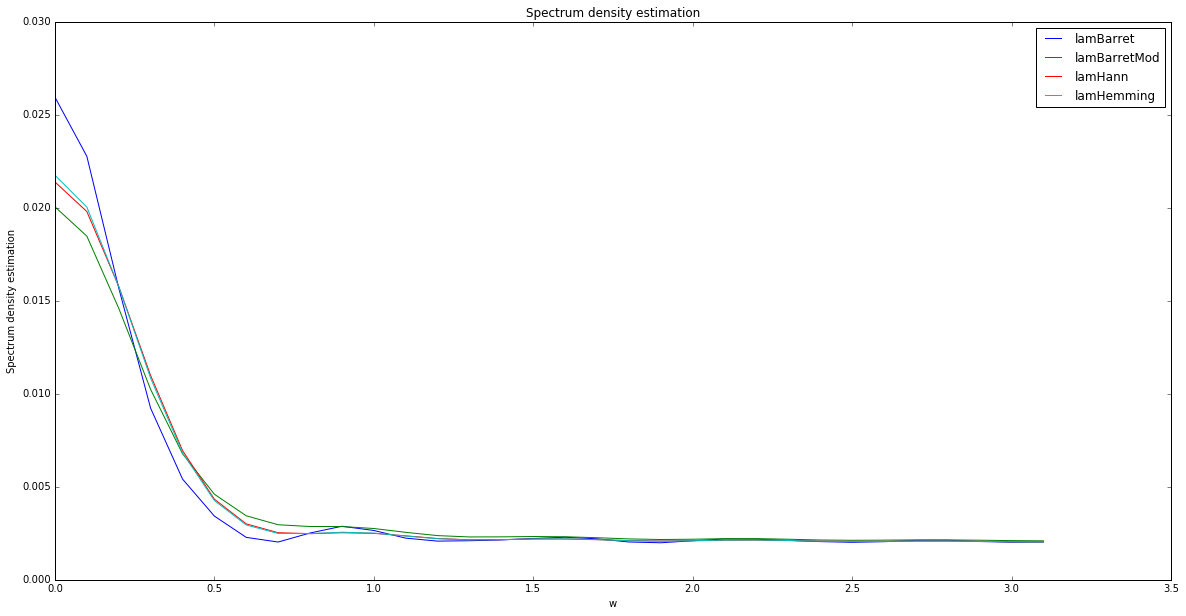

In [124]:
values = y_av
mean = 0
taumax = 17

def cov(t):
    summ = 0
    for i in range(0, len(values) - t - 1):
        summ += (values[i] - mean)*(values[i+t] - mean)
    return summ  


def SBarret(w, smoothFunction):    
    return (1/math.pi) * sum([smoothFunction(t)*cov(t)*math.cos(w*t) for t in np.arange(0, taumax)] )


    
ws = [i for i in np.arange(0, math.pi, 0.1)]    

plt.figure(figsize=(20, 10))
plt.title('Spectrum density estimation')
plt.xlabel('w')
plt.ylabel('Spectrum density estimation')    
plt.plot(ws, [SBarret(w,lamBarret) for w in ws], label='lamBarret')
plt.plot(ws, [SBarret(w,lamBarretMod) for w in ws], label='lamBarretMod')
plt.plot(ws, [SBarret(w,lamHann) for w in ws], label='lamHann')
plt.plot(ws, [SBarret(w,lamHemming) for w in ws], label='lamHemming')


# plt.plot(x, [lamBarretMod(t) for t in x], label='lamBarretMod')
# plt.plot(x, [lamHann(t) for t in x], label='lamBarretMod')
# plt.plot(x, [lamHemming(t) for t in x], label='lamBarretMod')
# plt.xlim(0,taumax+1)
# plt.ylim(0,taumax+1)
plt.legend()
plt.show()    

arima_model

In [11]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(1, figsize=(20,10))
plt.plot(data)
plt.plot(results_AR.fittedvalues, color='red')

ImportError: DLL load failed: Не найдена указанная процедура.

In [121]:
np.random.rayleigh(40,1)[0]

43.438609050589392

[12.357066246356515, 5.2308627853473268, 11.690316267022849, 13.548170477787119, 4.5762535291726856, 4.4871828408559926, 18.872334802740351, 12.669732721840676, 12.087190117693391, 7.351980669456311, 5.3746743230415959, 6.5851484683779056, 2.930217246408958, 6.91978022605461, 5.0523309637245184, 9.5380159756089391, 6.516705377016617, 6.8451871968888902, 6.1945521483212405, 4.2866513836504199, 3.51119655640953, 2.6174219747029186, 2.2812294062046647, 21.943697780410659, 8.237405296296533, 9.4164742809249162, 8.8787427241025281, 12.454721513717965, 7.1203409514024498, 8.0242360535104567, 8.8066183077964695]
244.256279103
244.077516158
244.038299678


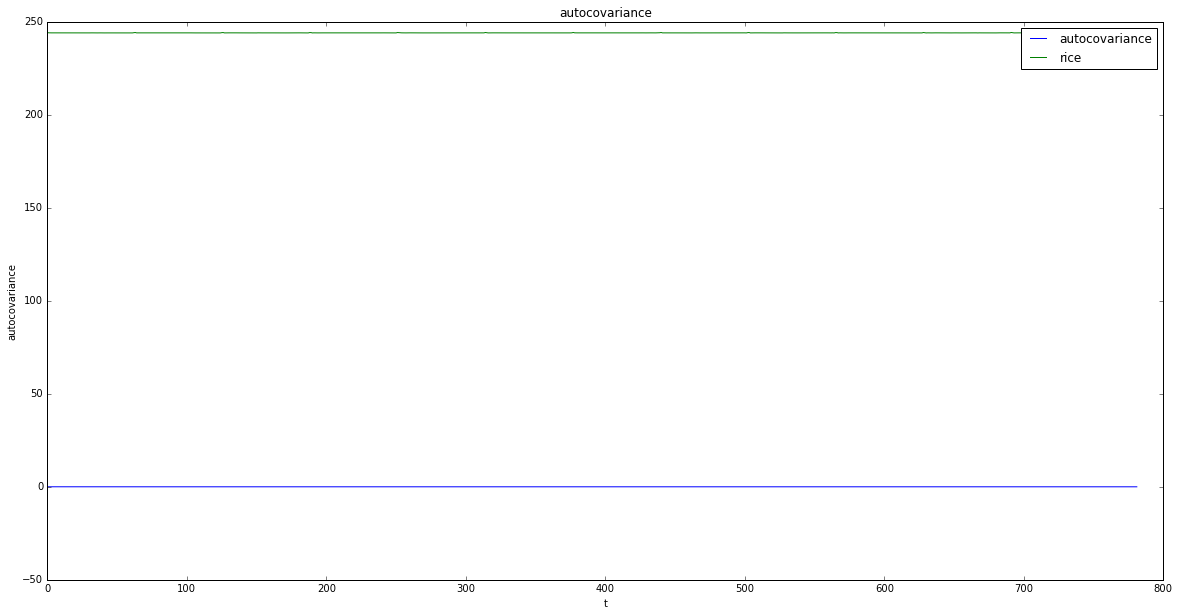

In [155]:
maxw = math.pi
deltaw = 0.1
np.arange(1, maxw/deltaw)

c1 = [np.random.rayleigh(math.sqrt(SBarret(w * deltaw,lamBarretMod))*deltaw, 1)[0] for w in np.arange(1, maxw/deltaw)]
phi = [np.random.rayleigh(2*math.pi, 1)[0] for w in np.arange(1, maxw/deltaw)]

print(phi)


def rice(t):
    return sum([c1[w]*math.cos(w*deltaw*t)+phi[w] for w in range(1, math.floor(maxw/deltaw))])


print(rice(0))
print(rice(1))
print(rice(2))


x = [i for i in range(0, len(values) - 1)]
y = [cov(i) for i in range(0, len(values) - 1)]



plt.figure(figsize=(20, 10))
plt.title('autocovariance')
plt.xlabel('t')
plt.ylabel('autocovariance')
plt.plot(x, y, label="autocovariance")
plt.plot(x, [rice(i) for i in range(0, len(values) - 1)], label="rice")
plt.legend()
plt.show()
    
    

